# Example of using the alpha argument for transparency

In [1]:
import healpy as hp
import numpy as np

In [2]:
nside = 128
npix = hp.nside2npix(nside)

In [3]:
np.random.seed(12)
signal = np.random.normal(size=npix)

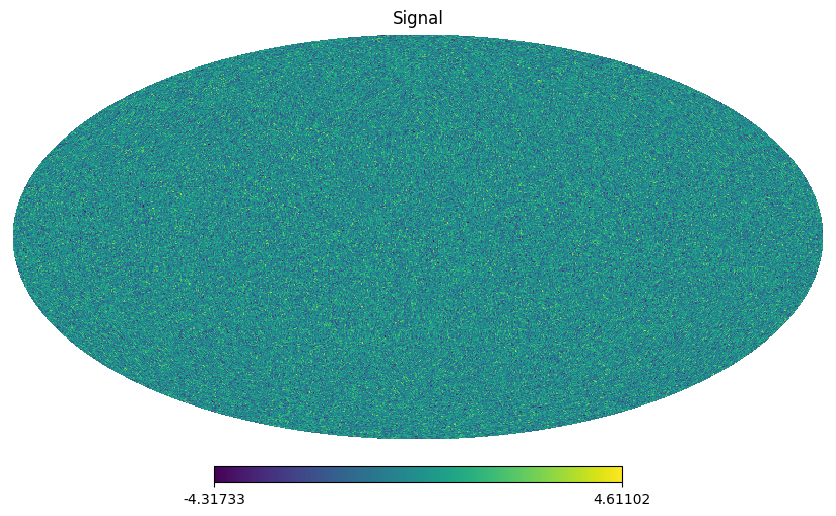

In [4]:
hp.mollview(signal, title="Signal")

In [5]:
gal_cut = np.radians(10)
mask = np.zeros(npix, dtype=np.float32)
mask[hp.query_strip(nside, np.pi/2-gal_cut, np.pi/2+gal_cut)] = 1
mask[hp.query_disc(nside, hp.ang2vec(np.pi/2, 0), np.radians(20))] = 1

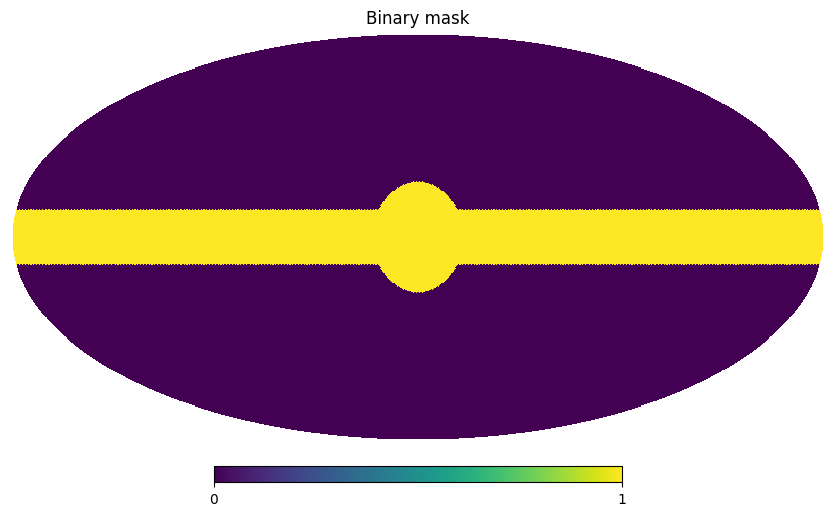

In [6]:
hp.mollview(mask, title="Binary mask")

In [7]:
apodized_mask = np.clip(hp.smoothing(mask, fwhm=np.radians(10)), 0, None)

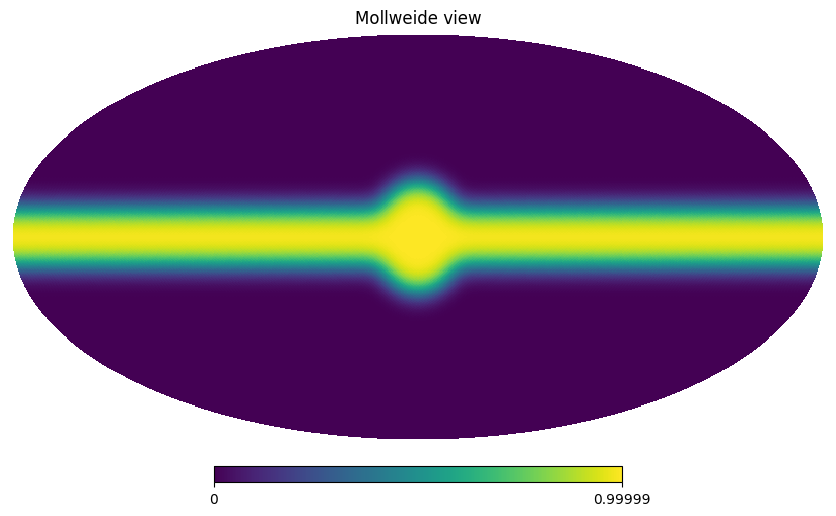

In [8]:
hp.mollview(apodized_mask)

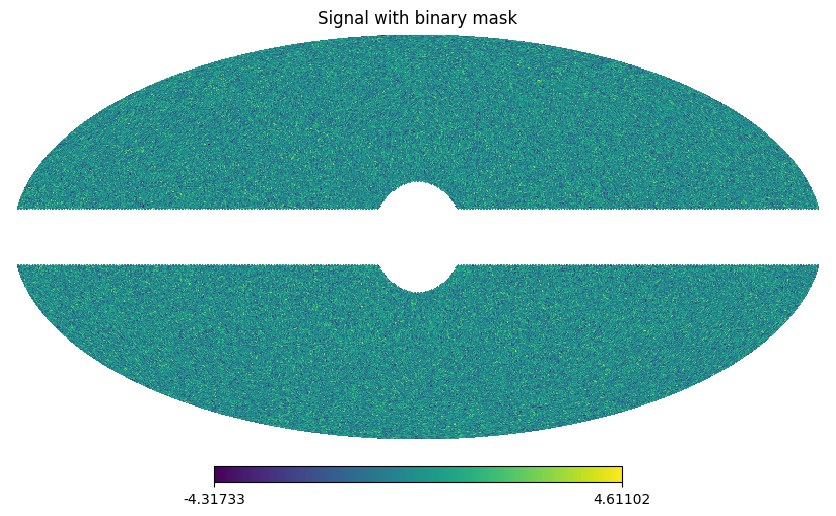

In [9]:
hp.mollview(signal, alpha=(1-mask), title="Signal with binary mask")

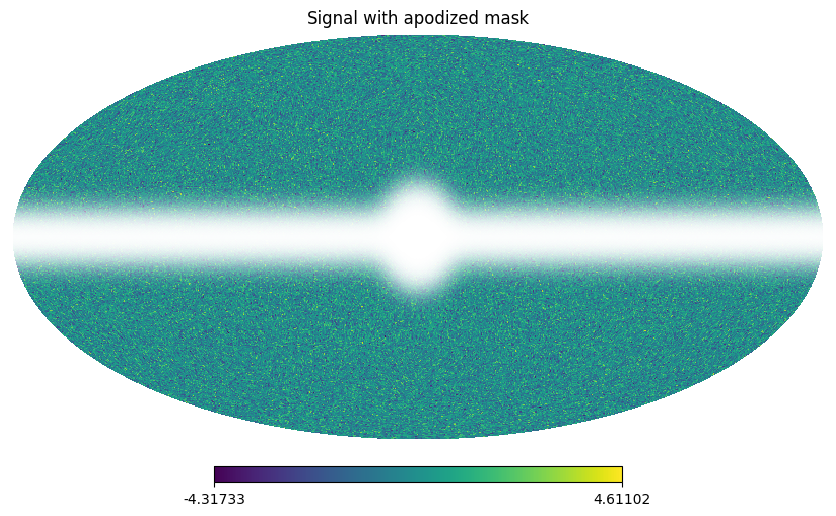

In [10]:
hp.mollview(signal, alpha=(1-apodized_mask), title="Signal with apodized mask")